# Endangered Species Across National Parks in the USA

## 1. Introduction

This notebook presents exploratory data analysis about endangered species across different national parks in the USA. There are two datasets, they are provided by the National Parks Service and contain information mainly about conservation status of each listed species and the number of each species that was observed at national parks. 

Here are a few questions that this project has sought to answer:
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

This notebook was arranged into three parts: Introduction, Analysis, and Conclusion. The Analysis contains smaller parts, it begins with basic explorations and preprocessing section, then the rest is question-oriented sections, based on questions above.

<mark>*Note: this project is part of my study of data science on [Codecademy.com](https://www.codecademy.com) and is based on their guideline and other resources. The data is provided by them and is fictional.*</mark>

## 2. Analysis
### 2. 1. Basic Exploration and Preprocessing

The two given datasets are:
- `observations.csv` contains data about recorded sightings of different species at several national parks for the past 7 days. The columns are:
    - `scientific_name` - the scientific name of each species
    - `park_name` - Park where species were found
    - `observations` - the number of times each species was observed at park
- `species_info.csv` contains data about different species and their conservations status. The columns are:
    - `category` - class of animal
    - `scientific_name` - the scientific name of each species
    - `common_name` - the common names of each species
    - `conservation_status` - each species’ current conservation status

### 2. 1. 1. Dataset 1: `observation.csv`

Here we import some necessary library for this section and later sections. Then we inspect a few rows from `observation.csv` and then check for basic information such as dataset shape, data types, null values, and duplicate values.

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data and get some basic information of the dataset

observations = pd.read_csv('observations.csv')
observations.info()
observations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
# modify data types

observations = observations.astype({'scientific_name': 'string', 'park_name': 'string'})

In [4]:
# check for the number of duplicate rows

number_of_duplicates = len(observations) - observations.duplicated().value_counts()[False]
print(f'There are {number_of_duplicates} duplicate entries found.')

There are 15 duplicate entries found.


In [5]:
# check whether the duplicates need to be modified (1)

# check the number of entries for each scientific_name
observations.scientific_name.value_counts()

Myotis lucifugus              12
Hypochaeris radicata          12
Holcus lanatus                12
Streptopelia decaocto         12
Castor canadensis             12
                              ..
Botrychium lanceolatum         4
Whitneya dealbata              4
Veronica agrestis              4
Primula suffrutescens          4
Dichanthelium depauperatum     4
Name: scientific_name, Length: 5541, dtype: Int64

In [6]:
# check whether duplicates need to modified (2)

# check entries related to 'Myotis lucifugus', which appears 12 times on the datasets
observations[observations.scientific_name == 'Myotis lucifugus']

,scientific_name,park_name,observations
1603,Myotis lucifugus,Great Smoky Mountains National Park,57
7094,Myotis lucifugus,Yellowstone National Park,239
8308,Myotis lucifugus,Great Smoky Mountains National Park,59
9318,Myotis lucifugus,Bryce National Park,103
9738,Myotis lucifugus,Yosemite National Park,124
10759,Myotis lucifugus,Bryce National Park,108
11395,Myotis lucifugus,Great Smoky Mountains National Park,58
12562,Myotis lucifugus,Yellowstone National Park,233
13611,Myotis lucifugus,Yosemite National Park,134
15865,Myotis lucifugus,Bryce National Park,87


>In summary:
>- The dataset `observations.csv` has 23296 entries with three columns.
>- The were some incorrect data types and it has been corrected.
>- There is no null value.
>- There are 15 duplicate rows, but as we have seen above, the observation of a specific species in a specific park could be conducted multiple times. This allows the possibility of getting the same values across some observations. Thus, we do not need to modify the duplicates.

### 2. 1. 2. Dataset 2: `species_info.csv`

In this section, we inspect a few rows from `species_info.csv` and then check for basic information such as dataset shape, data types, null values, and duplicate values.

In [7]:
# load the data and get some basic information of the dataset

species_info = pd.read_csv('species_info.csv')
species_info.info()
species_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
# modify data types

species_info = species_info.astype({'category': 'string', 'scientific_name': 'string',\
                  'common_names': 'string', \
                  'conservation_status': 'string'})

In [9]:
# check the number of duplicate rows

number_of_duplicates = len(species_info) - species_info.duplicated().value_counts()[False]
print(f'There are {number_of_duplicates} duplicate entries found.')

There are 0 duplicate entries found.


In [10]:
# check the number of duplicate values on scientific_name column,
# which we expect to be none based on the context of the dataset.

number_of_duplicates = len(species_info) - species_info.scientific_name.duplicated().value_counts()[False]
print(f'There are {number_of_duplicates} duplicate entries found on scientific_name column.')

There are 283 duplicate entries found on scientific_name column.


In [11]:
# handle null values on conservation_status column

# check unique values on conservation_status column
display(species_info.conservation_status.value_counts())
# replace null values on conservation_status column with 'No Status'
species_info.fillna('No Status', inplace=True)

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: Int64

>In summary:
>- The dataset `species_info.csv` has 5824 entries with four columns: `category`, `scientific_name`, `common_names`, and `conservation_status`.
>- The were some incorrect data types and it has been corrected. 
>- Three columns (`category`, `scientific_name`, `common_names`) do not have null value, while one column (`conservation_status`) has null values on most of its entries. We replaced these null values with 'No Status'.
>- There is no duplicate rows found, but we found that `scientific_name` column has 283 duplicate values. We have not made any change based on this finding and we will do it when it is needed by the later objectives.

### 2. 2. Distribution of Conservation Status

In this section, we explore the distribution of conservation status by analyzing its numbers and charts. As we know from the previous section, `scientific_name` column has 283 duplicate values. First, we will work on this problem so that the resulting distribution is more accurate.

The column `conservation_status` itself has several possible values:
- `No Status`: not under any conservation status
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

Below, this section is also provided with some key takeaways after a few block of codes to summarize the process we do and the insights from it. 

In [12]:
# find some duplicate scientific names and their numbers of occurences
species_info.scientific_name.value_counts().head()

Castor canadensis        3
Hypochaeris radicata     3
Columba livia            3
Puma concolor            3
Streptopelia decaocto    3
Name: scientific_name, dtype: Int64

In [13]:
# inspect some of the duplicates that is shown above
display(species_info[species_info.scientific_name == 'Castor canadensis'])
display(species_info[species_info.scientific_name == 'Columba livia'])
display(species_info[species_info.scientific_name == 'Puma concolor'])

,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",No Status
3050,Mammal,Castor canadensis,American Beaver,No Status
4475,Mammal,Castor canadensis,Beaver,No Status


,category,scientific_name,common_names,conservation_status
156,Bird,Columba livia,Rock Dove,No Status
3138,Bird,Columba livia,"Common Pigeon, Rock Dove, Rock Pigeon",No Status
4513,Bird,Columba livia,Rock Pigeon,No Status


,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),No Status
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",No Status
4451,Mammal,Puma concolor,Mountain Lion,No Status


In [14]:
# check the distribution of conservation status across the duplicates
species_info.conservation_status[species_info.scientific_name.duplicated() == True].value_counts()

No Status             270
Species of Concern     10
In Recovery             1
Threatened              1
Endangered              1
Name: conservation_status, dtype: Int64

In [15]:
# check duplicates that have different conservation status from their original (first) entry

# create a list of unique scientific names which has duplicates 
species_info_duplicate_sn = species_info[species_info.scientific_name.duplicated() == True].scientific_name.unique()

# loop over the list above to find the entries whose conservation status are not consistent
# sn: scientific name; cs: conservation status
for sn in species_info_duplicate_sn:
    checker = []
    for cs in species_info[species_info.scientific_name == sn].conservation_status:
        checker.append(cs)
    if len(np.unique(checker)) > 1:
        display(species_info[species_info.scientific_name == sn])

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,No Status
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


>Key takeaways:
>- There are 283 duplicates on `scientific_name` column. It is about 4.9% of the total entries.
>- Some duplicates have different `conservation_status` from its original (first entry). Since we cannot determine which status is right, we will omit all of them from further analysis. We have two species with this kind of case, they are *Canis lupus* and *Oncorhynchus mykiss*.
>- In the case where the duplicate has the same `conservation_status` from its original entry (first entry), we will only remove the duplicate and keep the original entries.

In [16]:
# delete entries with inconsistent conservation status
species_info = species_info[species_info['scientific_name'].str.contains('Canis lupus') == False]
species_info = species_info[species_info['scientific_name'].str.contains('Oncorhynchus mykiss') == False]

# deleting the other duplicates
species_info.drop_duplicates('scientific_name', inplace=True)

species_info.reset_index(inplace=True)
del species_info['index']

In [17]:
# find the proportion of each conservation status
cs_dist = pd.DataFrame(species_info.conservation_status.value_counts())

# create a new column 'percentage' that shows the percentage of the proportion.
cs_dist['percentage'] = (round((cs_dist.conservation_status / sum(cs_dist.conservation_status))*100, 2))

# create a new column 'percentage_excluding_nostatus' that shows the percentage of the proportion excluding species with no status.
cs_dist['percentage_excluding_nostatus'] = (round((cs_dist.conservation_status / sum(cs_dist.drop('No Status').conservation_status))*100, 2))
cs_dist.percentage_excluding_nostatus[0] = np.nan

# rearrange the rows
cs_dist = cs_dist.reindex(['No Status', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'])

display(cs_dist)

,conservation_status,percentage,percentage_excluding_nostatus
No Status,5361,96.8,<NA>
Species of Concern,151,2.73,85.31
Threatened,9,0.16,5.08
Endangered,14,0.25,7.91
In Recovery,3,0.05,1.69


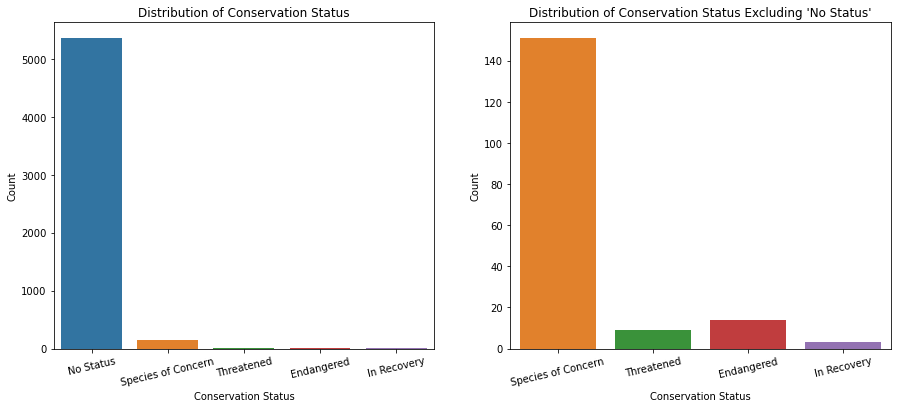

<Figure size 432x288 with 0 Axes>

In [18]:
#visualize the proportion

fig, axes = plt.subplots(1, 2, figsize=(15,6))
palette = sns.color_palette()

sns.barplot(x=cs_dist.index, y='conservation_status', data=cs_dist, ax=axes[0])
axes[0].set(title='Distribution of Conservation Status', xlabel='Conservation Status', ylabel='Count')
axes[0].tick_params('x', rotation = 13)

sns.barplot(x=cs_dist.drop('No Status').index, y='conservation_status', data=cs_dist.drop('No Status'), ax=axes[1], palette = palette[1:])
axes[1].set(title='Distribution of Conservation Status Excluding \'No Status\'', xlabel='Conservation Status', ylabel='Count')
axes[1].tick_params('x', rotation = 13)

plt.show()
plt.clf()

>In summary:
>- The data shows that 177 (or 3.2%) out of 5541 listed species are under conservation status.
>- Most of species that are under conservation status (85.31%) are classified as 'Species of Concern', while the other status have proportion in the range of 1.5% - 8%. 

### 2. 3. Bivariate Exploration on Species Category and  Conservation Status

In this section, we explore the relationship between species category and conservation status. We will calculate the proportion of each species category under each conservation status and then visualize these findings.

In [19]:
# create a dataframe that contains the proportion of species category under each conservation status

category_proportion = species_info.groupby(['conservation_status', 'category']).scientific_name.count().unstack()
category_proportion = category_proportion.reindex(['No Status', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'])
category_proportion = category_proportion.reindex(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile' ,  'Nonvascular Plant', 'Vascular Plant'], axis=1)

display(category_proportion)

category,Amphibian,Bird,Fish,Mammal,Reptile,Nonvascular Plant,Vascular Plant
conservation_status,,,,,,,
No Status,72.0,413.0,113.0,146.0,73.0,328.0,4216.0
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,3.0,2.0,NaN,NaN,2.0
Endangered,1.0,4.0,3.0,5.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [20]:
# calculate the percentages of the proportions

category_proportion_pct = category_proportion.copy()
sum_per_cs = category_proportion_pct.sum(axis=1)

for category in category_proportion_pct.columns:
     for i in range(5):
            category_proportion_pct[category][i] = round(100 * category_proportion_pct[category][i] / sum_per_cs[i], 2)

category_proportion_pct['Total %'] = category_proportion_pct.sum(axis=1)
            
display(category_proportion_pct)

category,Amphibian,Bird,Fish,Mammal,Reptile,Nonvascular Plant,Vascular Plant,Total %
conservation_status,,,,,,,,
No Status,1.34,7.70,2.11,2.72,1.36,6.12,78.64,99.99
Species of Concern,2.65,45.03,2.65,14.57,3.31,3.31,28.48,100.00
Threatened,22.22,NaN,33.33,22.22,NaN,NaN,22.22,99.99
Endangered,7.14,28.57,21.43,35.71,NaN,NaN,7.14,99.99
In Recovery,NaN,100.00,NaN,NaN,NaN,NaN,NaN,100.00


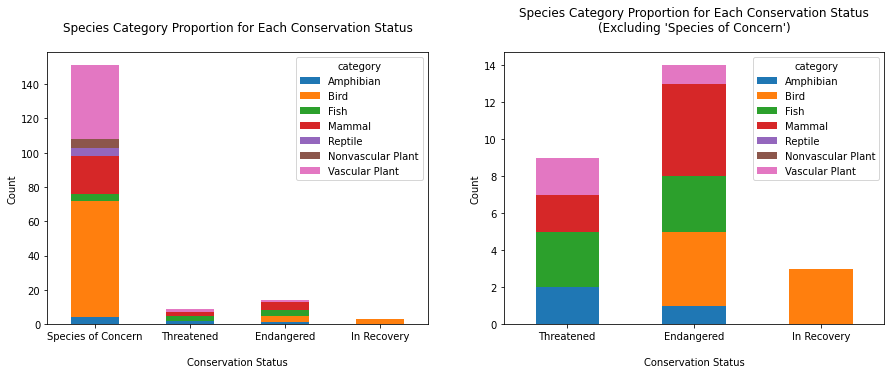

<Figure size 432x288 with 0 Axes>

In [21]:
# visualize the proportions

fig, axes = plt.subplots(1,2, figsize=(15,5))

# set the plot of 'Species Category Proportion for Each Conservation Status'
category_proportion.drop('No Status').plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set(title='Species Category Proportion for Each Conservation Status\n', xlabel='\nConservation Status', ylabel='Count')
axes[0].tick_params('x', rotation = 0)

# set the plot of 'Species Category Proportion for Each Conservation Status (Excluding 'Species of Concern')'
category_proportion.drop(['No Status', 'Species of Concern']).plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set(title='Species Category Proportion for Each Conservation Status\n(Excluding \'Species of Concern\')\n', xlabel='\nConservation Status', ylabel='Count')
axes[1].tick_params('x', rotation = 0)

plt.show()
plt.clf()

> In summary:
>- Bird and mammal have big proportion across multiple conservation status.
>- Reptile and nonvascular plant have low proportions across multiple conservation status and appear only under `Species of Concern` status.

### 2. 4. Statistical Significance of the Difference Between Species Category Proportions Under Conservation Status

This section will run chi-squared tests for all species category (in pairs) to see if different species have statistically significant different rates of being under any conservation status. So here we classify all species under conservation status as 'protected', and species with no status as 'not protected'. We will use significance level of 0.05 for the tests.

In [22]:
# create a dataframe that contains the input needed for chi-squared tests. 

protected = species_info.category[species_info.conservation_status != 'No Status'].value_counts().reset_index()
not_protected = species_info.category[species_info.conservation_status == 'No Status'].value_counts().reset_index()

chitest_input = protected.merge(not_protected, left_on='index', right_on='index')
chitest_input.columns = ['category', 'protected', 'not_protected' ]
chitest_input = chitest_input.reindex([4, 0, 3, 2, 5, 6, 1]).reset_index()
del chitest_input['index']

# add some columns that contains the proportion in percentages on different contexts:
#  proportion_in_protected: category proportion in all protected species
#  proportion_in_all: category proportion in all species (protected and not protected)
#  protected_rate: the rate of which a category being protected
chitest_input['proportion_in_protected'] = 100 * chitest_input['protected'] / sum(chitest_input['protected'])
chitest_input['proportion_in_all'] = 100 * (chitest_input['protected'] + chitest_input['not_protected']) / len(species_info)
chitest_input['protected_rate'] = 100 * chitest_input['protected'] / (chitest_input['protected'] + chitest_input['not_protected'])
chitest_input

,category,protected,not_protected,proportion_in_protected,proportion_in_all,protected_rate
0,Amphibian,7,72,3.954802,1.426508,8.860759
1,Bird,75,413,42.372881,8.811845,15.368852
2,Fish,10,113,5.649718,2.221018,8.130081
3,Mammal,29,146,16.384181,3.159986,16.571429
4,Reptile,5,73,2.824859,1.408451,6.410256
5,Nonvascular Plant,5,328,2.824859,6.013001,1.501502
6,Vascular Plant,46,4216,25.988701,76.959191,1.079305


In [23]:
# run chi-test for each pair of all categories and show the findings in a dataframe

# import dependency for chi-squared test
from scipy.stats import chi2_contingency

# create a dictionary to keep the p-values
chitest_result = {'category': ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile' ,  'Nonvascular Plant', 'Vascular Plant']} 

# test each pair of categories
for category1 in chitest_input.category:
    chitest_result[category1] = []
    for category2 in chitest_input.category:
        test = chi2_contingency([[chitest_input[chitest_input.category == category1].protected.iloc[0], chitest_input[chitest_input.category == category1].not_protected.iloc[0]],\
                         [chitest_input[chitest_input.category == category2].protected.iloc[0], chitest_input[chitest_input.category == category2].not_protected.iloc[0]]])
        chitest_result[category1].append(round(test[1], 4))

# convert the dictionary into a dataframe        
chitest_result = pd.DataFrame(chitest_result)

display(chitest_result)

,category,Amphibian,Bird,Fish,Mammal,Reptile,Nonvascular Plant,Vascular Plant
0,Amphibian,1.0000,0.1759,1.0000,0.1508,0.7815,0.0018,0.0000
1,Bird,0.1759,1.0000,0.0539,0.7994,0.0531,0.0000,0.0000
2,Fish,1.0000,0.0539,1.0000,0.0508,0.8597,0.0013,0.0000
3,Mammal,0.1508,0.7994,0.0508,1.0000,0.0467,0.0000,0.0000
4,Reptile,0.7815,0.0531,0.8597,0.0467,1.0000,0.0336,0.0001
5,Nonvascular Plant,0.0018,0.0000,0.0013,0.0000,0.0336,1.0000,0.6623
6,Vascular Plant,0.0000,0.0000,0.0000,0.0000,0.0001,0.6623,1.0000


In [24]:
# hide non-significant result from the dataframe for a simpler visual

# creating a copy of previous dataframe to modify
chitest_result_significant = chitest_result.copy().set_index('category')
chitest_result_significant = chitest_result_significant.astype('object')

# replace non-significant results with '-'
for category1 in chitest_result_significant.columns:
    for category2 in chitest_result_significant.index:
        if chitest_result_significant[category1][category2] >= 0.05:
            chitest_result_significant.at[category2, category1] = '-'

display(chitest_result_significant.reset_index())

,category,Amphibian,Bird,Fish,Mammal,Reptile,Nonvascular Plant,Vascular Plant
0,Amphibian,-,-,-,-,-,0.0018,0.0
1,Bird,-,-,-,-,-,0.0,0.0
2,Fish,-,-,-,-,-,0.0013,0.0
3,Mammal,-,-,-,-,0.0467,0.0,0.0
4,Reptile,-,-,-,0.0467,-,0.0336,0.0001
5,Nonvascular Plant,0.0018,0.0,0.0013,0.0,0.0336,-,-
6,Vascular Plant,0.0,0.0,0.0,0.0,0.0001,-,-


>In summary:
>- Plants, either nonvascular or vascular, have a statistically significant lower rate of needed protection compared with any animal category.
>- Mammals have a statistically significant higher rate of needed protection compared to reptiles.
>- Birds do not have a statistically significant higher rate of needed protection, despite having a big proportion in protected species. We found that birds consist of a lot of different species, more than any animal category. Thus it makes their proportion in protected case bigger.

### 2. 5. The Most Spotted Animal 

The next set of analysis will use `observations.csv`, a dataset from the conservationists as they have been recording sightings of different species at several national parks for 7 days.

In this section, we use the common names of animals (e.g., bat, cat, tiger) to refer to the animals. So, a common name may be used to refer to several scientific names. We will try to find the animal with the highest number of observations.

The first step is to create a list that contains all unique words from `common_names` column in `species_info` dataset. Then, we will calculate the number of observations related to each word from that list and find the word with the highest number.

In [25]:
# split the common names into single words

from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

cn_list = species_info[(species_info.category != "Vascular Plant") & (species_info.category != "Nonvascular Plant")]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

cn_list[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [27]:
# flatten the list

cn_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cn_list))
cn_list[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Bison']

In [28]:
# remove duplicate words

cn_list = np.unique(np.array(cn_list)).tolist()

In [29]:
# calculate total number observations for each species

observations_groupby_sn = observations.groupby('scientific_name').sum().reset_index()
observations_groupby_sn = observations_groupby_sn.merge(species_info[(species_info.category != "Vascular Plant") & (species_info.category != "Nonvascular Plant")][['scientific_name', 'common_names']], how='inner', on='scientific_name')
observations_groupby_sn.observations.fillna(0, inplace=True)
display(observations_groupby_sn.sort_values('observations', ascending= False).head())

,scientific_name,observations,common_names
836,Streptopelia decaocto,1785,Eurasian Collared-Dove
143,Castor canadensis,1725,"American Beaver, Beaver"
704,Puma concolor,1711,Panther (Mountain Lion)
684,Procyon lotor,1692,"Common Raccoon, Raccoon"
200,Columba livia,1653,Rock Dove


In [30]:
# calculate total number observations for each word (from the common_names)

import re

cn_observations = []
for index1 in range(len(cn_list)):
    count = 0
    for index2 in observations_groupby_sn.index:
        temp = fr'.*\b{cn_list[index1]}\b.*'
        if re.match(temp, observations_groupby_sn.common_names[index2]):
            count += observations_groupby_sn.observations[index2]
    cn_observations.append(count)
    
cn_observations[:5]

[549, 553, 518, 559, 0]

In [31]:
# join the words and their total observations in a dataframe

cn_df = pd.DataFrame(cn_list, columns = ['common_name'])
cn_df['total_observations'] = cn_observations

cn_df.sort_values("total_observations", ascending = False).head(10)

,common_name,total_observations
757,Warbler,33394
448,Northern,27445
598,Salamander,23377
209,Eastern,22939
49,Black,21197
534,Red,18615
767,Western,18050
154,Common,18040
7,American,17608
673,Sparrow,16278


> Key takeaway: the most spotted animal is warbler.

In [32]:
# now we begin the steps to find the distribution of warbler observations
# make a new column that contains boolean value regarding whether the entries are warbler

species_info['is_warbler'] = species_info.common_names.str.contains(r"\bWarbler\b", regex = True)
species_info[species_info.is_warbler].head()

,category,scientific_name,common_names,conservation_status,is_warbler
89,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,No Status,True
246,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,No Status,True
247,Bird,Dendroica castanea,Bay-Breasted Warbler,No Status,True
248,Bird,Dendroica cerulea,Cerulean Warbler,No Status,True
249,Bird,Dendroica coronata,Yellow-Rumped Warbler,No Status,True


In [33]:
# merge 'observations' and 'species_info' (only warblers)

warbler_observations = observations.merge(species_info[species_info.is_warbler])
warbler_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,No Status,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,No Status,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,No Status,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,No Status,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,No Status,True


In [34]:
# find the distribution of observations across parks

warbler_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


> In summary:
> - The most spotted animals are warblers with total observations of 33394, followed by salamanders (23377) and sparrows (16278).
> - Nearly half of the warbler observations (14487) occured in Yellowstone National Park. The other three parks had numbers of observations in the range of 4400 - 8800.

## 3. Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The data shows that 177 (or 3.2%) out of 5541 listed species are under conservation status.
    - Most of species that are under conservation status (85.31%) are classified as 'Species of Concern', while the other status have proportion in the range of 1.5% - 8%. 
- Are certain types of species more likely to be endangered?
    - Mammals and Birds has relatively high percentages of being in protection.
- Are the differences between species and their conservation status significant?
    - Mammals have a statistically significant higher rate of needed protection compared to reptiles.
    - Plants, either nonvascular or vascular, have a statistically significant lower rate of needed protection compared with any animal category.
- Which animal is most prevalent and what is their distribution amongst parks?
    - The most spotted animals are warblers with total observations of 33394, followed by salamanders (23377) and sparrows (16278).
    - Nearly half of the observations of warblers (14487) occured in Yellowstone National Park. The other three parks had numbers of observations in the range of 4400 - 8800.